## Описание проекта

Вместе с отделом маркетинга крупного интернет-магазина мы подготовили список гипотез для увеличения выручки. Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.

Задачи:
* Приоритизировать гипотезы для увеличения выручки.
* Запустить A/B-тест.
* Проанализировать результаты.

**Проект будет состоять из двух частей**

Часть 1 (приоритизация гипотез):
* Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
* Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
* Укажем как изменилась приоритизация гипотез при применении RICE вместо ICE и объяснить почему так произошло.

Часть 2 (анализ A/B-теста):
* Построим график кумулятивной выручки по группам.
* Построим график кумулятивного среднего чека по группам.
* Построим график относительного изменения кумулятивного среднего чека группы B к группе A.
* Построим график кумулятивной конверсии по группам.
* Построим график относительного изменения кумулятивной конверсии группы B к группе A.
* Построим точечный график количества заказов по пользователям.
* Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
* Построим точечный график стоимостей заказов.
* Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
* Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.
* Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
* Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. 
* Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
* Примем решение по результатам теста.

**Описание данных**

**Структура hypothesis.csv**
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Структура orders.csv**
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
*  group — группа A/B-теста, в которую попал заказ.

**Структура visitors.csv**
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

## Загрузим данные и подготовим их к анализу

Импортируем библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math as mth
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

Прочитаем данные из файлов и сохраним их

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

Посмотрим содержимое hypothesis.csv

In [3]:
def total_info(df, name_list):
    print('Таблица', name_list)
    display(df.head(10))
    print('Общая информация таблицы', name_list)
    display(df.info())
    print('Hаличие нулевых обьектов в таблице', name_list)
    display(df.isnull().sum())
    print('Наличие пропусков в таблице', name_list)
    display(df.isna().sum())
    print('Hаличие дубликатов в таблице', name_list)
    display(df.duplicated().sum())

In [4]:
total_info(hypothesis, 'hypothesis')

Таблица hypothesis


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Общая информация таблицы hypothesis
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

Hаличие нулевых обьектов в таблице hypothesis


Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

Наличие пропусков в таблице hypothesis


Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

Hаличие дубликатов в таблице hypothesis


0

* Нужно изменить название столбцов (привести к нижнему регистру).
* Нужно сбросить ограничения на количество отображаемых символов, чтобы прочитать гипотезы.
* В таблице нет нулевых объектов, пропусков и дубликатов.

Приведем названия столбцов к нижнему регистру и зададим максимальное количество символов в столбцах, чтобы посмотреть гипотезы

In [5]:
hypothesis.columns = hypothesis.columns.str.lower()

pd.options.display.max_colwidth = 150
display(hypothesis.head(10))

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Пропусков, дубликатов, нулевых значений не обнаружено, названия столбцов приведены к нижнему регистру и задано максимальное количество символов в столбцах для корректного отображения гипотез, поэтому можем приступать к их приоритизации.

## Часть 1. Приоритизация гипотез

Фреймворк ICE рассчитаем по следующей формуле 𝐼𝐶𝐸 𝑆𝐶𝑂𝑅𝐸 = (𝐼𝑚𝑝𝑎𝑐𝑡 𝑥 𝐶𝑜𝑛𝑓𝑖𝑑𝑒𝑛𝑐𝑒) / 𝐸𝑓𝑓𝑜𝑟𝑡𝑠, где:

* 𝐼𝑚𝑝𝑎𝑐𝑡 — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
* 𝐶𝑜𝑛𝑓𝑖𝑑𝑒𝑛𝑐𝑒 — насколько мы уверены, что это изменение повлияет на пользователей именно так;
* 𝐸𝑓𝑓𝑜𝑟𝑡𝑠 — сколько стоит протестировать эту гипотезу.

**Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета**

In [6]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
display(hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Наиболее перспективные гипотезы по методу ICE - это гипотезы 8, 0 и 7. У них достаточно высокие значения оценок по предполагаемому влиянию на пользователя (impact гипотезы 8 = 9, impact гипотезы 0 = 10 и impact гипотезы 7 = 7) и уверенности оценивающего (confidence гипотезы 8 = 9, confidence гипотезы 0 = 8, confidence гипотезы 7 = 8) при затратах, необходимых на тестирование гипотезы (efforts гипотезы 8 = 5, efforts гипотезы 0 = 6, efforts гипотезы 7 = 5).

**Вывод**

Наиболее перспективные гипотезы по ICE:
1. Запустить акцию, дающую скидку на товар в день рождения	 (гипотеза 8, ICE = 16.2);
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (гипотеза 0, ICE = 13.3);
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (гипотеза 7, ICE = 11.2).

У ICE метода есть модификация RICE, рассчитаем по формуле 𝑅𝐼𝐶𝐸 𝑆𝐶𝑂𝑅𝐸 = (𝑅𝑒𝑎𝑐ℎ 𝑥 𝐼𝑚𝑝𝑎𝑐𝑡 𝑥 𝐶𝑜𝑛𝑓𝑖𝑑𝑒𝑛𝑐𝑒) / 𝐸𝑓𝑓𝑜𝑟𝑡𝑠, где

* 𝑅𝑒𝑎𝑐ℎ — скольких пользователей затронет изменение, которое мы хотите внести;
* 𝐼𝑚𝑝𝑎𝑐𝑡 — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
* 𝐶𝑜𝑛𝑓𝑖𝑑𝑒𝑛𝑐𝑒 — насколько мы уверены, что это изменение повлияет на пользователей именно так;
* 𝐸𝑓𝑓𝑜𝑟𝑡𝑠 — сколько стоит протестировать эту гипотезу.

**Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета**

In [7]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
display(hypothesis[['hypothesis', 'RICE']].sort_values('RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы по методу RICE - это гипотезы 7, 2 и 0. Согласно данному методу первой на проверку следует поставить гипотезу номер 7, так как ее изменения достаточно сильно (impact = 7) скажутся на количестве пользователей (reach = 10), при уверенности оценивающего (confidence = 8) и при затратах, необходимых на ее тестирование (efforts = 5). Следующие после гипотезы 7 идут гипотезы, которые сильно уступают ей по величине RICE (RICE гипотезы 7 = 112, RICE гипотезы 2 = 56, RICE гипотезы 0 = 40) из-за отставания по составляющим показателям: у гипотезы 0 низкий охват пользователей, которых затронут изменения (reach = 3), у гипотезы 2 низкое значение влияния изменения на пользователей (impact = 3).

**Вывод**

Наиболее перспективные гипотезы по RICE:
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (гипотеза 7, RICE = 112);
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	 (гипотеза 2, RICE = 56);
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (гипотеза 0, RICE = 40).

**Укажем как изменилась приоритизация гипотез при применении RICE вместо ICE и объяснить почему так произошло**

In [8]:
display(hypothesis)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2


RICE - это показатель охвата гипотезы, как много пользователей она затронет. В приоритет у нас вышли гипотезы 7 и 2, которые имеют самый высокий параметр reach (охват пользователей), то есть скольких пользователей затронет изменение, которое мы хотим внести ( reach гипотезы номер 7 = 10, а гипотезы номер 2 = 8). Гипотеза 0 осталась в топ-3 за счет самого высокого показателя влияния на пользователей (impact = 10). В случае выбора метода ICE мы не учитываем охват изменений.

**Вывод**

Наиболее перспективные гипотезы по фреймворку ICE под номерами 8, 0 и 7:
1. Запустить акцию, дающую скидку на товар в день рождения	 (гипотеза 8, ICE = 16.2);
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (гипотеза 0, ICE = 13.3);
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (гипотеза 7, ICE = 11.2).

После применения RICE приоритизация гипотез изменилась на гипотезы под номерами 7, 2 и 0.:
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (гипотеза 7, RICE = 112);
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	 (гипотеза 2, RICE = 56);
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (гипотеза 0, RICE = 40).

Это связано с тем, что в расчете фреймворка RICE учитывается охват пользователей «Reach», а в ICE – нет.

## Часть 2. Анализ A/B-теста

Посмотрим таблицу с заказами

In [9]:
total_info(orders, 'orders')

Таблица orders


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


Общая информация таблицы orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

Hаличие нулевых обьектов в таблице orders


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Наличие пропусков в таблице orders


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Hаличие дубликатов в таблице orders


0

* Нужно изменить название столбцов transactionId и visitorId (привести к нижнему регистру).
* Нужно изменить тип данных в столбце с датой.
* Нет нулевых объектов, пропусков и дубликатов.

Посмотри за какой период представлены данные, количество уникальных пользователей, заказов

Для orders

In [10]:
orders.agg(['min','max','nunique'])

,transactionId,visitorId,date,revenue,group
min,1062393,5114589,2019-08-01,50,A
max,4293855558,4283872382,2019-08-31,1294500,B
nunique,1197,1031,31,713,2


Для visitors

In [11]:
visitors.agg(['min','max','nunique'])

,date,group,visitors
min,2019-08-01,A,361
max,2019-08-31,B,770
nunique,31,2,58


В таблицах orders и visitors у нас представлена информация за август 2019 года, 1031 уникальных пользователей, 1197 заказов.

Посмотрим таблицу с пользователями

In [12]:
total_info(visitors, 'visitors')

Таблица visitors


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


Общая информация таблицы visitors
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

Hаличие нулевых обьектов в таблице visitors


date        0
group       0
visitors    0
dtype: int64

Наличие пропусков в таблице visitors


date        0
group       0
visitors    0
dtype: int64

Hаличие дубликатов в таблице visitors


0

* Нужно изменить тип данных в столбце с датой.
* В таблице приведены данные за тот же период, что и в orders, нет нулевых объектов, пропусков и дубликатов.

Приведем названия столбцов к нижнему регистру и изменим тип данных в столбце с датой

In [13]:
orders.columns = orders.columns.str.lower()
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

Теперь проверим данные на наличие пользователей которые могли одновременно попасть в обе тестовые группы, посчитаем их количество

In [14]:
user_two_group = orders.groupby('visitorid').agg({'group': 'nunique'}).query('group > 1')
print('Количество пользователей которые одновременно попали в две группы:', user_two_group['group'].count())

Количество пользователей которые одновременно попали в две группы: 58


У нас 58 пользователей в обеих тестовых группах. Сообщим об этой ситуации дата-инженеру и будем учитывать возможность ее повторения в дальнейшем, чтобы наши А/Б-тесты проходили корректно.

**Построим график кумулятивной выручки по группам**

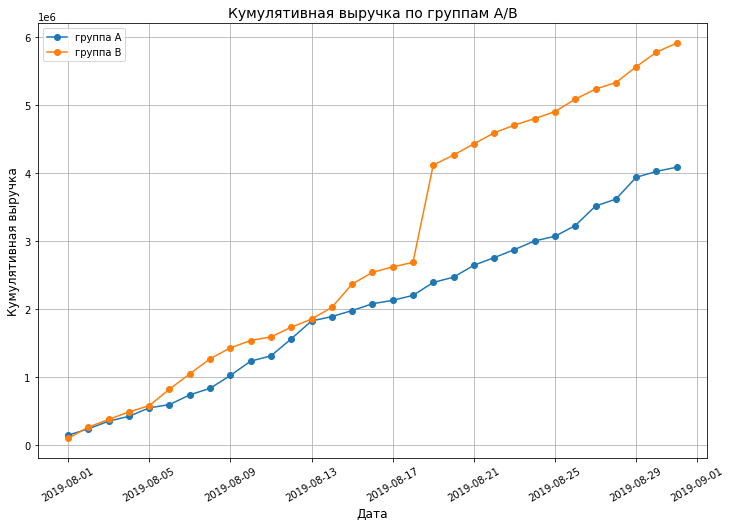

In [15]:
# создадим массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получим агрегированные кумулятивные по дням данные о заказах
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group']))

# получим агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']))

# объединим кумулятивные данные в одной таблице
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А и B
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'orders']]
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'orders']]

# построим график выручки для группы А и B
plt.figure(figsize=(12,8))
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='группа A', marker='o')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='группа B', marker='o')
plt.title('Кумулятивная выручка по группам A/B', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Кумулятивная выручка', fontsize=12)
plt.xticks(rotation=30)
plt.legend()
plt.grid()
plt.show()

Выручка в обеих группах имеет восходящую тенденцию на протяжении всего теста. Кумулятивная выручка в группе В выше почти с самого начала теста, затем заметен резкий «скачок», что может быть связано со всплеском числа заказов, либо с появлением очень дорогих заказов в выборке.

**Построим график кумулятивного среднего чека по группам**

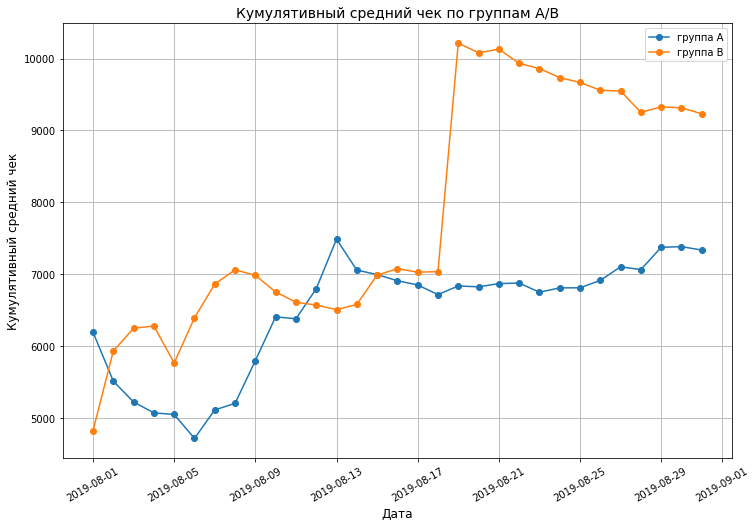

In [16]:
# построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
plt.figure(figsize=(12,8))
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue']/cummulativeRevenueA['orders'], label='группа A', marker='o')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue']/cummulativeRevenueB['orders'], label='группа B', marker='o')
plt.title('Кумулятивный средний чек по группам A/B', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Кумулятивный средний чек', fontsize=12)
plt.xticks(rotation=30)
plt.legend()
plt.grid()
plt.show()

Средний чек в группе А стабилизируется к середине теста, в то время как средний чек в группе В существенно вырос после 17 августа (резкий всплеск на графике) и значительно превысил средний чек группы А, хотя и стал затем постепенно снижаться. Это может быть связано с одной или несколькими очень дорогими покупками, поэтому потребуется анализ выбросов.

**Построим график относительного изменения кумулятивного среднего чека группы B к группе A**

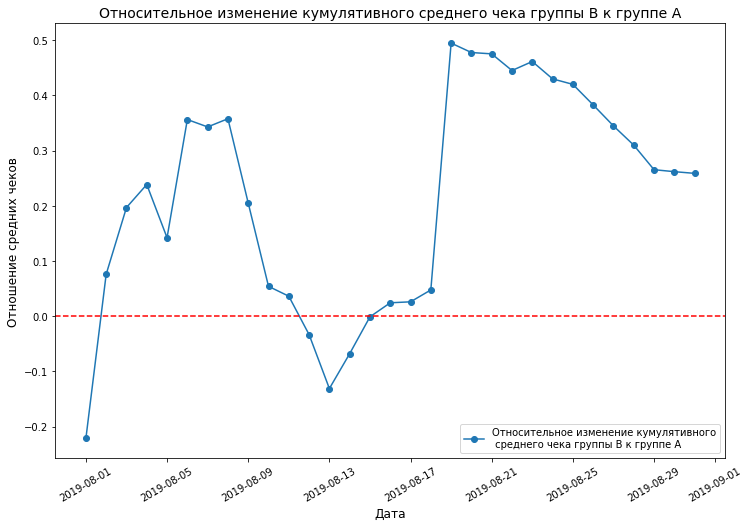

In [17]:
plt.figure(figsize=(12,8))
# собираем данные в одном датафрейме
mergedCummulativeRevenue = cummulativeRevenueA.merge(cummulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCummulativeRevenue['date'], (mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/(mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1, label='Относительное изменение кумулятивного\n среднего чека группы B к группе A', marker='o')
plt.legend(loc='lower right')
# добавляем ось X
plt.axhline(y=0, color='red', linestyle='--')
# задаем масштаб осей
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Отношение средних чеков', fontsize=12)
plt.xticks(rotation=30)
plt.show()

График различия между сегментами резко «скачет», то есть в самом начале теста средний чек группы B стабильно растет, затем снижается и снова резко растет. Все три графика демонстрируют одинаковую картину. Необходимо проверить данные на наличие выбросов.

**Построим график кумулятивной конверсии по группам**

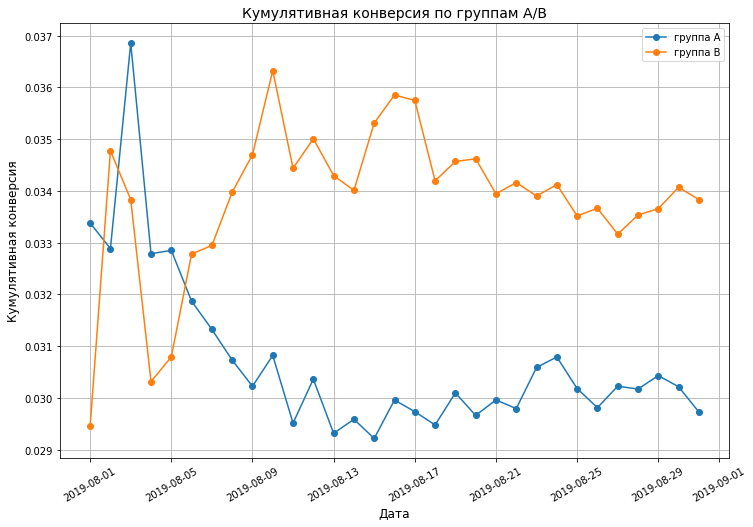

In [18]:
# считаем кумулятивную конверсию
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']

cummulativeData['date'] = pd.to_datetime(cummulativeData['date'], format='%Y-%m-%d')

# отделяем данные по группе A и B
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12,8))
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='группа A', marker='o')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='группа B', marker='o')
plt.title('Кумулятивная конверсия по группам A/B', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Кумулятивная конверсия', fontsize=12)
plt.xticks(rotation=30)
plt.legend()
plt.grid()
plt.show()

Группы колебались около одного значения, но затем группа B стала стабильно показывать большую конверсию чем группа A.

**Построим график относительного изменения кумулятивной конверсии группы B к группе A**

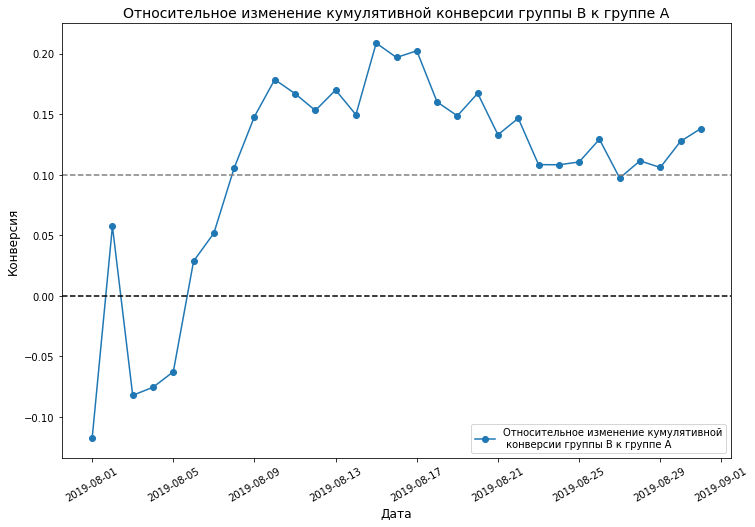

In [19]:
# построим график относительного различия кумулятивных конверсий
mergedCummulativeConversions = cummulativeDataA[['date','conversion']].merge(cummulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12,8))
plt.plot(mergedCummulativeConversions['date'], mergedCummulativeConversions['conversionB']/mergedCummulativeConversions['conversionA']-1, label='Относительное изменение кумулятивной\n конверсии группы B к группе A', marker='o')
plt.legend(loc="lower right")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Конверсия', fontsize=12)
plt.xticks(rotation=30)
plt.show()

В начале теста группа B проигрывала группе A, но затем вырвалась вперед и по графику видим, что конверсия группы B стабильно лучше конверсии группы A. При этом у нас снова присутствуют «скачки» - стоит проанализировать аномальные значения.

**Построим точечный график количества заказов по пользователям**

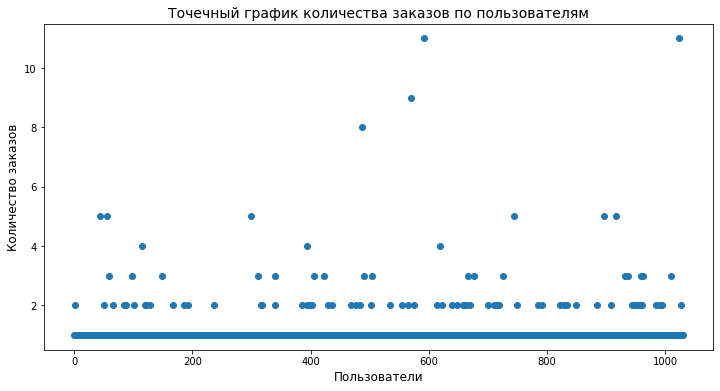

In [20]:
# посчитаем количество заказов по пользователям и посмотрим на результат
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsers.columns = ['visitorid','orders']

# построим точечную диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(12,6))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям', fontsize=14)
plt.xlabel('Пользователи', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.show()

На графике видны выбросы. Некоторые посетители сделали более 10 заказов и таких аномалии искажают картину конверсии. Большинство пользователей совершают 1 заказ, хотя довольно много и тех, кто делает 2 или 3 заказа. Посмотрим на перцентили для определения границ аномального количества заказов на одного пользователя.

**Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей**

In [21]:
# определим 95 и 99 перцентили количества заказов на одного пользователя
print('95-й и 99-й перцентили количества заказов на пользователя:', np.percentile(ordersByUsers['orders'], [95, 99]))

95-й и 99-й перцентили количества заказов на пользователя: [2. 4.]


Не более 5% пользователей совершили больше 2 заказов и не более 1% пользователей – больше 4 заказов. Выберем 2 заказа на одного пользователя (95-й перцентиль) за нижнюю границу числа заказов и отсеем аномальных пользователей по ней.

**Построим точечный график стоимостей заказов**

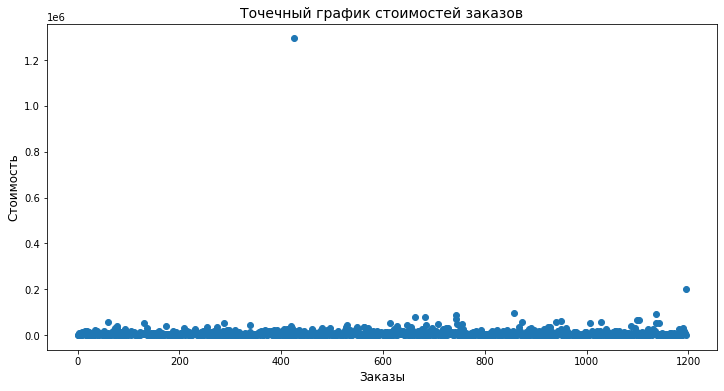

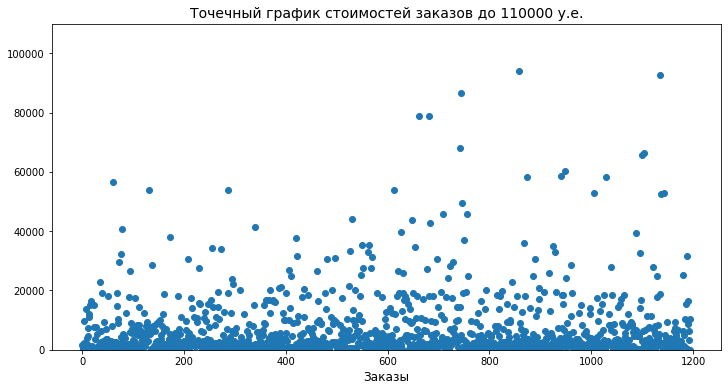

In [22]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(12,6))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов', fontsize=14)
plt.xlabel('Заказы', fontsize=12)
plt.ylabel('Стоимость', fontsize=12)
plt.show()

# ограничим ось y, чтобы лучше увидеть распределение стоимостей заказов
plt.figure(figsize=(12,6))
plt.ylim(0, 110000)
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимостей заказов до 110000 у.е.', fontsize=14)
plt.xlabel('Заказы', fontsize=12)
plt.show()

Видим, что в наших данных есть выбросы, которые вызывали «скачки» на графиках среднего чека и выручки, так у нас оказался один очень крупный заказ (~ 1.3 млн у.е.), что существенно влияет на результаты теста, при этом основная масса заказов имеет стоимость примерно до 30 тыс. у.е. Необходимо выбрать границу для определения аномальных заказов.

**Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов**

In [23]:
# определим 95 и 99 перцентили стоимости заказов
print('95-й и 99-й перцентили стоимости заказов:', np.percentile(orders['revenue'], [95, 99]))

95-й и 99-й перцентили стоимости заказов: [28000.  58233.2]


Не более чем 5% заказов чек дороже 28000 у.е., выберем 28000 у.е. на одного пользователя за нижнюю границу выручки (95 перцентиль) и отсеем аномальных пользователей по ней.

**Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным**

Сформулируем нулевую и альтернативную гипотезы для проверки критерием Манна-Уитни. Выберем этот критерий, т.к. мы видели, что в результатах присутствуют выбросы, а непараметрический тест основан на рангах и его результаты не подвержены влиянию имеющихся выбросов.
* H₀: по «сырым» данным в конверсии между группами A и B нет статистически значимых различий.
* H₁: по «сырым» данным в конверсии между группами A и B есть статистически значимые различия.

Посчитаем статистическую значимость различий в конверсии и затем в среднем чеке между группами по «сырым» данным - без удаления аномальных пользователей. Начнем с подготовки данных.

In [24]:
# посчитаем количество пользователей до выбранной даты включительно в группах A и B
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date': 'max', 'visitorsPerDateA': 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date': 'max', 'visitorsPerDateB': 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# почитаем суммарное число заказов до выбранной даты включительно в группах A и B
ordersADaily = orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date': 'max',
                'ordersPerDateA': 'sum',
                'revenuePerDateA': 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date': 'max',
                'ordersPerDateB': 'sum',
                'revenuePerDateB': 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

# сформируем таблицу с количеством заказов, суммарной выручкой в день, количеством заказов и выручкой до выбранной даты (включительно)
# количеством пользователей до выбранной даты 
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
#display(data.head(5))

# создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
# в них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов

ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

# подготовим выборки к проверке критерием Манна-Уитни. Объявим переменные sampleA и sampleB, 
# в которых пользователям из разных групп будет соответствовать количество заказов. 
# тем, кто ничего не заказал, будут соответствовать нули
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

# выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1.
# применим статистический критерий и отформатируем p-value, округлив его до трех знаков после запятой
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.017
0.138


По «сырым» данным значение p-value меньше 0.05, поэтому отвергаем нулевую гипотезу, в конверсии групп A и B есть статистически значимые различия. Относительный выигрыш в среднем чеке группы B по «сырым» данным равен 13.8%.

**Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным**

Сформулируем нулевую и альтернативную гипотезы:
* H₀: по «сырым» данным в среднем чеке между группами A и B нет статистически значимых различий.
* H₁: по «сырым» данным в среднем чеке между группами A и B есть статистически значимые различия.

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов и найдем относительные различия в среднем чеке между группами:

In [25]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


По «сырым» данным значение p-value значительно больше 0.05. У нас не получилось отвергнуть нулевую гипотезу, нет оснований считать, что есть различия в среднем чеке между группами A и B. Относительный выигрыш в среднем чеке группы B по «сырым» данным равен 25.9%.

**Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным**

Сформулируем нулевую и альтернативную гипотезы:
* H₀: по «очищенным» данным в конверсии между группами A и B нет статистически значимых различий.
* H₁: по «очищенным» данным в конверсии между группами A и B есть статистически значимые различия.

Теперь сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers и узнаем сколько всего аномальных пользователей методом shape()

In [26]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print('Количество аномальных пользователей: {}'.format(abnormalUsers.shape))

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
Количество аномальных пользователей: (74,)


Всего 74 аномальных пользователя. Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста, затем применим статистический критерий Манна-Уитни к полученным выборкам.

In [27]:
# подготовим выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
        pd.Series( 0,index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders',),],axis=0,)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0,index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders',),],axis=0,)

# применим статистический критерий Манна-Уитни к полученным выборкам
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.013
0.173


По «очищенным» данным значение p-value меньше 0.05, поэтому отвергаем нулевую гипотезу, в конверсии между группами A и B есть статистически значимые различия. Относительный выигрыш в конверсии группы B по «очищенным» данным равен 17.3%.

**Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным**

Сформулируем нулевую и альтернативную гипотезы:
* H₀: по «очищенным» данным в среднем чеке между группами A и B нет статистически значимых различий.
* H₁: по «очищенным» данным в среднем чеке между группами A и B есть статистически значимые различия.

In [28]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.738
-0.020


По «очищенным» данным значение p-value значительно больше 0.05, то есть у нас не получилось отвергнуть нулевую гипотезу, нет оснований считать, что есть различия в среднем чеке групп A и B. Относительный проигрыш в среднем чеке группы B по «очищенным» данным равен 2%.

**Решение по результатам теста**

В зависимости от приоритетной для нас цели можем дать следующие рекомендации:
* Если для нас важно только повышение конверсии, то можем остановить тест и признавать его успешным, зафиксировав победу группы В.
* Если мы ожидали повышение среднего чека, то необходимо продолжить тест до установления отношения средних чеков по группам и подтверждения с помощью статистических тестов значимости в превышении среднего чека группы В над средним чеком группы А.

## **Общий вывод**

**По приоритизации гипотез:**
* Наиболее перспективные гипотезы по фреймворку ICE под номерами 8, 0 и 7.
* После применения RICE приоритизация гипотез изменилась на гипотезы под номерами 7, 2 и 0.

Это связано с тем, что в расчете фреймворка RICE учитывается охват пользователей «Reach», а в ICE – нет.

**По анализу A/B-теста:**
* Как по «сырым» данным, так и по «очищенным» между конверсиями групп А и В есть статистически значимая разница.
* Нет статистически значимой разницы по среднему чеку между группами А и В ни по «сырым», ни по «очищенным данным.

В зависимости от приоритетной цели можем дать следующие рекомендации:
* Если для нас важно только повышение конверсии, то можем остановить тест и признавать его успешным, зафиксировав победу группы В.
* Если мы ожидали повышение среднего чека, то необходимо продолжить тест до установления отношения средних чеков по группам и подтверждения с помощью статистических тестов значимости в превышении среднего чека группы В над средним чеком группы А.